# Decision trees and Random forest 

In [ ]:
import pandas as pd
import numpy as np
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [48]:
df = pd.read_csv('co_properties.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)

## **Data preprocessing**

In [49]:
def categoricas(df,lista):
    dummies= pd.get_dummies(df[lista])
    df=df.drop(columns=lista)
    data = pd.concat([df, dummies], axis=1)
    return data
    

In [50]:
df=df[df['operation_type']=='Venta']
df=df[df['property_type']=='Casa']
df=df[df['currency']=='COP']
df=df[df['l3']=='Bogotá D.C']

In [51]:
df=df.drop(columns=['l6','id','ad_type','start_date','created_on','l1','l2','l3','end_date','title','price_period','title','description','property_type','operation_type','currency'])

In [52]:
df=df.dropna(subset=['l4','l5','price'])

In [53]:
df=categoricas(df,['l4','l5'])

In [54]:
variables=['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered']

In [55]:
for i in variables:
    df.loc[df[i].isnull()==True,i+'null']=1
    df.loc[df[i].isnull()==False,i+'null']=0
    df.loc[df[i].isnull()==True,i]=-1
    

## **Regression tree**

In [60]:
data=df

In [61]:
df.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'l4_Zona Centro', 'l4_Zona Chapinero',
       'l4_Zona Noroccidental', 'l4_Zona Norte', 'l4_Zona Occidental',
       'l4_Zona Sur', 'l4_Zona Suroccidental', 'l5_Antonio Nariño',
       'l5_Barrios Unidos', 'l5_Bosa', 'l5_Chapinero', 'l5_Ciudad Bolívar',
       'l5_Engativa', 'l5_Fontibón', 'l5_Kennedy', 'l5_La Candelaria',
       'l5_Los Mártires', 'l5_Puente Aranda', 'l5_Rafael Uribe Uribe',
       'l5_San Cristobal', 'l5_Santa Fe', 'l5_Suba', 'l5_Teusaquillo',
       'l5_Tunjuelito', 'l5_Usaquén', 'l5_Usme', 'latnull', 'lonnull',
       'roomsnull', 'bedroomsnull', 'bathroomsnull', 'surface_totalnull',
       'surface_coverednull'],
      dtype='object')

- Randomly defined train and test set

In [62]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['price']),data['price'], test_size=0.30,
                                                    random_state=200,
                                                    shuffle=True)

In [65]:
tree2=DecisionTreeRegressor().fit(x_train,y_train)

In [66]:
mse(y_test, tree2.predict(x_test))

2.81847535501357e+18

- Know, we want to define the max_depht parameter that minimizes the out of sample using cross validation. 

In [67]:
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30)},
                  cv=10,
                  n_jobs=10,
                  scoring='neg_mean_squared_error')
cv_tree1=gs.fit(x_train, y_train)

In [69]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=16)

In [70]:
mse(y_test, cv_tree1.predict(x_test))

2.800219951583987e+18

- **Ploting tree**

In [71]:
from sklearn import tree

In [72]:
model=DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

In [73]:
data.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'l4_Zona Centro', 'l4_Zona Chapinero',
       'l4_Zona Noroccidental', 'l4_Zona Norte', 'l4_Zona Occidental',
       'l4_Zona Sur', 'l4_Zona Suroccidental', 'l5_Antonio Nariño',
       'l5_Barrios Unidos', 'l5_Bosa', 'l5_Chapinero', 'l5_Ciudad Bolívar',
       'l5_Engativa', 'l5_Fontibón', 'l5_Kennedy', 'l5_La Candelaria',
       'l5_Los Mártires', 'l5_Puente Aranda', 'l5_Rafael Uribe Uribe',
       'l5_San Cristobal', 'l5_Santa Fe', 'l5_Suba', 'l5_Teusaquillo',
       'l5_Tunjuelito', 'l5_Usaquén', 'l5_Usme', 'latnull', 'lonnull',
       'roomsnull', 'bedroomsnull', 'bathroomsnull', 'surface_totalnull',
       'surface_coverednull'],
      dtype='object')

[Text(465.0, 792.75, 'lon <= -74.085\nmse = 1.2672035859144773e+18\nsamples = 14597\nvalue = 864277917.527'),
 Text(232.5, 566.25, 'lon <= -74.146\nmse = 1.8504206306225706e+17\nsamples = 7797\nvalue = 468901908.468'),
 Text(116.25, 339.75, 'bathrooms <= 3.5\nmse = 4.709768088369066e+16\nsamples = 2867\nvalue = 292712775.795'),
 Text(58.125, 113.25, 'mse = 3.4569889441081224e+16\nsamples = 2125\nvalue = 246147217.712'),
 Text(174.375, 113.25, 'mse = 5.89814700847775e+16\nsamples = 742\nvalue = 426071011.544'),
 Text(348.75, 339.75, 'bathrooms <= 4.5\nmse = 2.367115690886311e+17\nsamples = 4930\nvalue = 571363215.441'),
 Text(290.625, 113.25, 'mse = 1.8480797377085952e+17\nsamples = 4134\nvalue = 517121394.448'),
 Text(406.875, 113.25, 'mse = 4.1163445453710195e+17\nsamples = 796\nvalue = 853066341.05'),
 Text(697.5, 566.25, 'bathrooms <= 3.5\nmse = 2.123265516933611e+18\nsamples = 6800\nvalue = 1317623026.738'),
 Text(581.25, 339.75, 'surface_total <= 377.0\nmse = 1.4328977988220938e+1

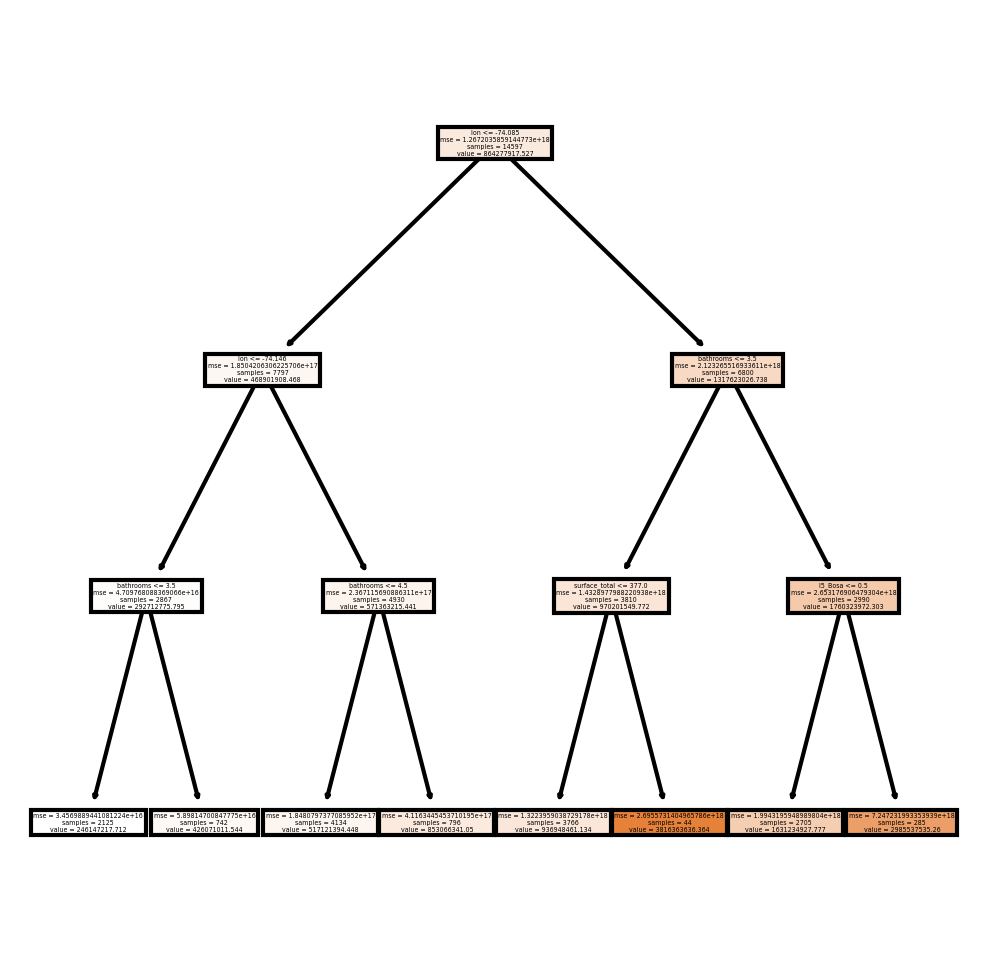

In [74]:
fn=data.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True)

In [62]:
fig.savefig('regression_tree.png')

## **Random Forest**

In [75]:
rf = RandomForestRegressor(random_state = 42).fit(x_train,y_train)

In [76]:
mse(y_test, rf.predict(x_test))

2.6744010629446205e+18

The random forest model has a lot of parameter we can optimize to get a better fit in our model.
- n_estimators = number of trees in the foreset
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [77]:
n_estimators =  [50,100,150]
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

In [78]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = 10, verbose = 2)


rf_cv=grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   11.4s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:  7.5min finished


In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=40, n_estimators=50)

- Even if with the random forest model we loss a lot of the model interpretation that a simple decision tree gave us, we can still get the importance of each feauture 

In [80]:
importances1 =rf_cv.best_estimator_.feature_importances_

In [81]:
importances_df1=pd.DataFrame({'importances':importances1,'feauture':data.drop(columns=['price']).columns})

In [82]:
importances_df1=importances_df1.sort_values(by=['importances'],ascending=False)

In [83]:
importances_df1

,importances,feauture
1,0.343387,lon
0,0.238936,lat
4,0.177259,bathrooms
3,0.059202,bedrooms
17,0.035026,l5_Chapinero
5,0.024585,surface_total
2,0.021702,rooms
31,0.016048,l5_Usaquén
10,0.015513,l4_Zona Norte
36,0.011912,bedroomsnull


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

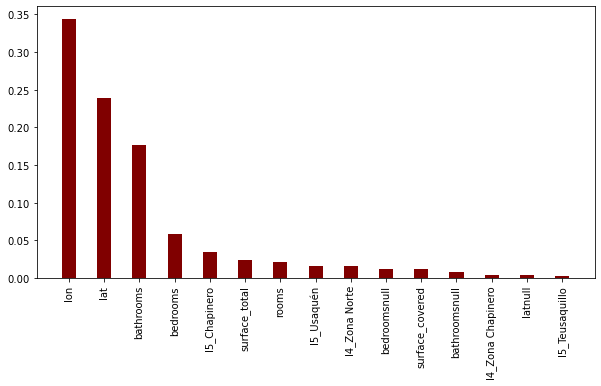

In [84]:
fig = plt.figure(figsize = (10, 5))
plt.bar(importances_df1.feauture[:15],importances_df1.importances[:15], color ='maroon',
        width = 0.4)
plt.xticks( rotation='vertical')

## **GBM**

- [Some information about GBM'S parameters](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

In [ ]:
n_estimators =  [700]
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10]
learning_rate=[0.15,0.05,0.01,0.005]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
              'learning_rate':learning_rate
              }
gbm= GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 5, n_jobs = 7, verbose = 2,scoring='neg_mean_squared_error')
gbm_cv=grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:  4.8min


In [ ]:
grid_search.best_estimator_

In [ ]:
mse(y_test, gbm_cv.predict(x_test))

## **XGBOOST**

- [some information on XGBOOST](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [ ]:
grid = {
        'learning_rate': [0.01, 0.1,0.2,0.3,0.5],
        'max_depth': [10,20,30,40,50],
        'objective': ['reg:squarederror']
    }
xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = grid,                         
                           scoring = 'neg_mean_squared_error', 
                           cv = 5,
                           n_jobs = 7,
                           verbose = 1)

xg_cv=gsearch.fit(x_train,y_train)

In [ ]:
mse(y_test, xg_cv.predict(x_test))

In [ ]:
xg_cv.best_estimator_

In [ ]:
df2= pd.Series(xg_cv.best_estimator_.feature_importances_, list(data.drop(columns=['price']))).sort_values(ascending=False)
df2[:15].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## **Classification problem**


- To see how we can apply decision trees to a classification problem we are going use the following [data](https://www.kaggle.com/uciml/pima-indians-diabetes-database), to build models which objective is to predict if a person is diabetic.

In [99]:
data2=pd.read_csv('diabetes.csv')

In [100]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(data2.drop(columns=['Outcome']),data2['Outcome'], test_size=0.10,
                                                    random_state=200,
                                                    shuffle=True)

In [101]:
data2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
clf1=DecisionTreeClassifier(max_depth=3).fit(x1_train,y1_train)

In [103]:
y_pred=clf1.predict(x1_test)
accuracy_score(y1_test, y_pred)

In [105]:
accuracy_score(y1_test, y_pred)

0.7792207792207793

- Optimize max_depth in classification problem

In [106]:
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30)},
                  cv=10,
                  n_jobs=10,
                  scoring='accuracy')

clf2=gs.fit(x1_train, y1_train)

In [107]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [108]:
y_pred1=clf2.predict(x1_test)

In [109]:
accuracy_score(y1_test, y_pred1)

0.7402597402597403

**Random forest for classification problems**

In [50]:
rf_clf=RandomForestClassifier().fit(x1_train,y1_train)

In [111]:
y_pred2=rf_clf.predict(x1_test)

In [112]:
accuracy_score(y1_test, y_pred2)

0.8181818181818182

In [113]:
rfcl = RandomForestClassifier()
n_estimators =  [50,100,150]
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 5, n_jobs = 10, verbose = 2)
rfcl_cv=grid_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 264 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:   15.4s finished


In [114]:
y_pred3=rfcl_cv.predict(x1_test)

In [115]:
accuracy_score(y1_test, y_pred3)

0.8181818181818182

In [116]:
importances =rfcl_cv.best_estimator_.feature_importances_

In [117]:
importances_df=pd.DataFrame({'importances':importances,'feauture':data2.drop(columns=['Outcome']).columns})

In [118]:
importances_df

,importances,feauture
0,0.079684,Pregnancies
1,0.240129,Glucose
2,0.093205,BloodPressure
3,0.066722,SkinThickness
4,0.068128,Insulin
5,0.182514,BMI
6,0.127781,DiabetesPedigreeFunction
7,0.141837,Age


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

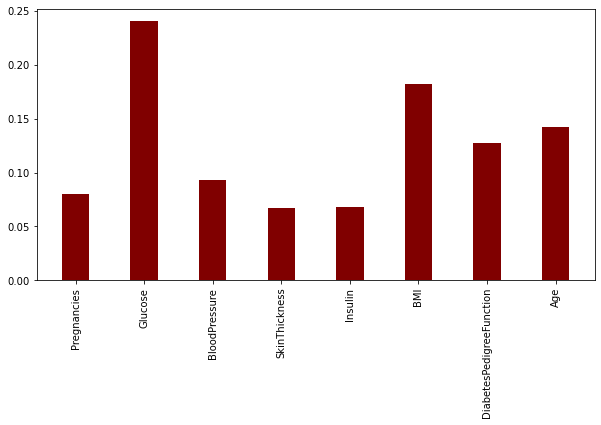

In [119]:
fig = plt.figure(figsize = (10, 5))
plt.bar(importances_df.feauture,importances_df.importances, color ='maroon',
        width = 0.4)
plt.xticks( rotation='vertical')